<a href="https://colab.research.google.com/github/pdomins/imputation-methods/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Inputation methods

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset:** thyroidDF.csv - 9172 observations x 31 attributes

**Atributes:**
- age - age of the patient (int)
- sex - sex patient identifies (str)
- on_thyroxine - whether patient is on thyroxine (bool)
- query on thyroxine - *whether patient is on thyroxine (bool)
- on antithyroid meds - whether patient is on antithyroid meds (bool)
- sick - whether patient is sick (bool)
- pregnant - whether patient is pregnant (bool)
- thyroid_surgery - whether patient has undergone thyroid surgery (bool)
- I131_treatment - whether patient is undergoing I131 treatment (bool)
- query_hypothyroid - whether patient believes they have hypothyroid (bool)
- query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
- lithium - whether patient * lithium (bool)
- goitre - whether patient has goitre (bool)
- tumor - whether patient has tumor (bool)
- hypopituitary - whether patient * hyperpituitary gland (float)
- psych - whether patient * psych (bool)
- TSH_measured - whether TSH was measured in the blood (bool)
- TSH - TSH level in blood from lab work (float)
- T3_measured - whether T3 was measured in the blood (bool)
- T3 - T3 level in blood from lab work (float)
- TT4_measured - whether TT4 was measured in the blood (bool)
- TT4 - TT4 level in blood from lab work (float)
- T4U_measured - whether T4U was measured in the blood (bool)
- T4U - T4U level in blood from lab work (float)
- FTI_measured - whether FTI was measured in the blood (bool)
- FTI - FTI level in blood from lab work (float)
- TBG_measured - whether TBG was measured in the blood (bool)
- TBG - TBG level in blood from lab work (float)
- referral_source - (str)
- target - hyperthyroidism medical diagnosis (str)
- patient_id - unique id of the patient (str)





In [10]:
df = pd.read_csv("thyroidDF.csv")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [11]:
nan_count_per_column = df.isnull().sum()
nan_count_nonzero = nan_count_per_column[nan_count_per_column != 0]


print("Number of NaN values per column:")
print(nan_count_nonzero)

Number of NaN values per column:
sex     307
TSH     842
T3     2604
TT4     442
T4U     809
FTI     802
TBG    8823
dtype: int64


In [23]:
two_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=2)
first_color = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=1)[0]

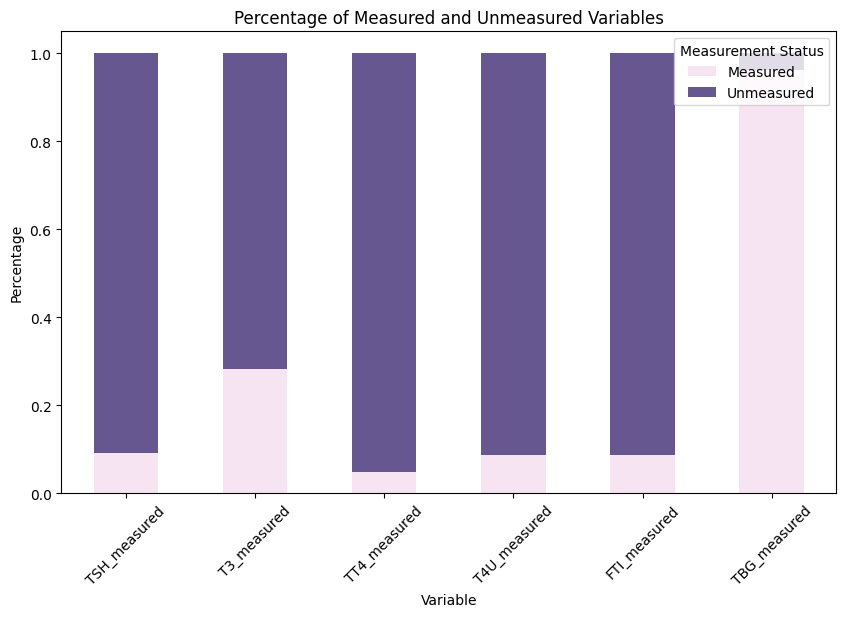

In [13]:
columns_to_plot = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

measured_counts = df[columns_to_plot].apply(lambda col: col.value_counts(normalize=True)).T
measured_counts.columns = ['Measured', 'Unmeasured']

measured_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=two_colors)
plt.title('Percentage of Measured and Unmeasured Variables')
plt.xlabel('Variable')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Measurement Status', loc='upper right')
plt.show()

In [19]:
ages_greater_than_100 = df[df['age'] > 100]

if not ages_greater_than_100.empty:
    print("Values of 'age' greater than 100 found:")
    print(ages_greater_than_100)
else:
    print("No values of 'age' greater than 100 found.")

total_ages = len(df['age'])
ages_count_greater_than_100 = len(ages_greater_than_100)

print(f"Total number of ages: {total_ages}")
print(f"Number of ages greater than 100: {ages_count_greater_than_100}")

df = df[df['age'] <= 100]

Values of 'age' greater than 100 found:
        age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
2976    455   F            f                  f                   f    f   
5710  65511   M            f                  f                   f    f   
6392  65512   M            f                  f                   f    f   
8105  65526   F            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
2976        f               f              f                 f  ...  118.0   
5710        f               f              f                 f  ...  113.0   
6392        f               f              f                 f  ...  112.0   
8105        f               f              f                 f  ...  132.0   

     T4U_measured   T4U FTI_measured    FTI TBG_measured TBG  referral_source  \
2976            t  1.13            t  104.0            f NaN              SVI   
5710            t  1.08   

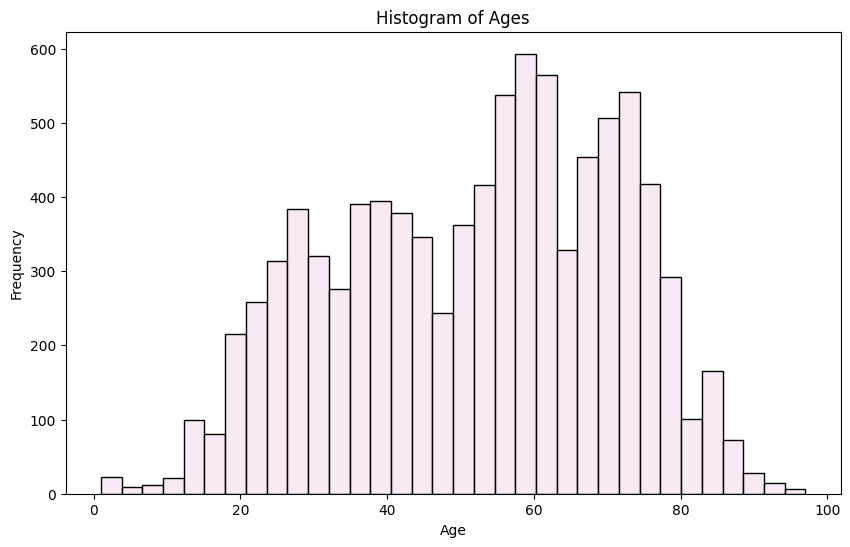

In [24]:
age_data = df['age']

plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins='auto', color=first_color)
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()